In [1]:
using Plots
pyplot()

using FileIO
using JLD2
using Statistics

In [2]:
data_dir = normpath(joinpath(@__DIR__, 
                             "multi_target_localization"));

In [3]:
data = load(joinpath(data_dir, "statistical_data_localization_openloop.jld2"))
ergodic_data = load(joinpath(data_dir, "statistical_data_localization_openloop_ergodic.jld2"));

safe_rngnums = ergodic_data["safe_rngnums"];

In [4]:
data_tlqg = load(joinpath(data_dir, "statistical_data_tlqg_localization_openloop.jld2"));

tcalc_tlqg = data_tlqg["tcalc_tlqg"]
tcalc_tlqg_offline = data_tlqg["tcalc_tlqg_offline"]
cost_tlqg = data_tlqg["cost_tlqg"];
time_idx_array = data_tlqg["time_idx_array"];

In [5]:
cost_greedy = data["cost_greedy"]
cost_sacbp = data["cost_sacbp"]
cost_mcts = data["cost_mcts"]
cost_ergodic = ergodic_data["cost_ergodic"]
tcalc_greedy = data["tcalc_greedy"]
tcalc_sacbp = data["tcalc_sacbp"]
tcalc_mcts = data["tcalc_mcts"]
tcalc_ergodic = ergodic_data["tcalc_ergodic"];

# Plot Stats Data
cost_std_mcts = [std([cost[ii] for cost in cost_mcts]) for ii = 1:length(cost_mcts[1])]
cost_std_sacbp = [std([cost[ii] for cost in cost_sacbp]) for ii = 1:length(cost_sacbp[1])]
cost_std_greedy = [std([cost[ii] for cost in cost_greedy]) for ii = 1:length(cost_greedy[1])];
cost_std_ergodic = [std([cost[ii] for cost in cost_ergodic]) for ii = 1:length(cost_ergodic[1])];
cost_std_tlqg = [std([cost[ii] for cost in cost_tlqg]) for ii = 1:length(cost_tlqg[1])];

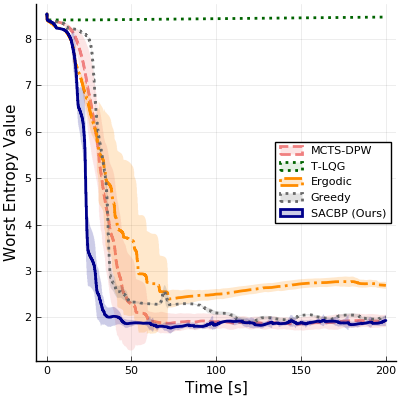

In [6]:
MetricHistoryMCTS = mean(cost_mcts)
plot(time_idx_array,MetricHistoryMCTS[1:end-1],label="MCTS-DPW",ribbon=cost_std_mcts,color=:lightcoral,fillalpha=0.2,linewidth=2.,linestyle=:dash)
MetricHistoryTLQGOnline = mean(cost_tlqg);
plot!(time_idx_array,MetricHistoryTLQGOnline[1:end-1],label="T-LQG",color=:darkgreen,ribbon=cost_std_tlqg,fillalpha=0.1,linewidth=2.,linestyle=:dot)
MetricHistoryErgodic = mean(cost_ergodic)
plot!(time_idx_array,MetricHistoryErgodic[1:end-1],label="Ergodic",ribbon=cost_std_ergodic,color=:darkorange,fillalpha=0.2,linewidth=2.,linestyle=:dashdot)
MetricHistoryGreedy = mean(cost_greedy)
plot!(time_idx_array,MetricHistoryGreedy[1:end-1],xlabel="Time [s]",ribbon=cost_std_greedy,fillalpha=0.2,ylabel="Worst Entropy Value",label="Greedy",color=:dimgrey,linewidth=2.,linestyle=:dot)
MetricHistorySACBP = mean(cost_sacbp)
plot!(time_idx_array,MetricHistorySACBP[1:end-1],label="SACBP (Ours)",ribbon=cost_std_sacbp,fillalpha=0.2,color=:darkblue,linewidth=2.,size=(400,400))

In [7]:
#savefig(joinpath(data_dir, "tracking_costs_with_tlqg.pdf"))

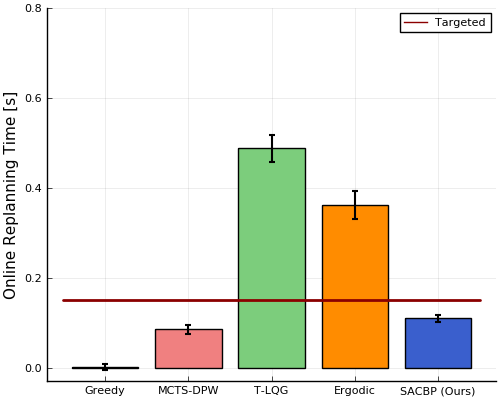

In [8]:
# Plot Computation Time Comparison
tcalcTrueArray = [tcalc_greedy,tcalc_mcts,tcalc_tlqg,tcalc_ergodic,tcalc_sacbp]
meanTcalcTrueArray = mean.(tcalcTrueArray);
stdTcalcTrueArray = std.(tcalcTrueArray);
bar([1,2,3,4,5],meanTcalcTrueArray,yerror=stdTcalcTrueArray,linecolor=:black,marker=stroke(1.5,:black, :dash),c=[:dimgrey,:lightcoral,:palegreen3,:darkorange,:royalblue3],label="",size=(500,400));
xticks!([1,2,3,4,5],["Greedy","MCTS-DPW","T-LQG","Ergodic","SACBP (Ours)"]);
plot!([0.5,5.5],[3/4*0.2,3/4*0.2],width=2,label="Targeted",color=:darkred,ylim=(-0.03,0.8))
ylabel!("Online Replanning Time [s]")

In [9]:
#savefig(joinpath(data_dir, "tracking_time_with_tlqg.pdf"))

In [10]:
mean(tcalc_tlqg_offline)

43.87233518823027

In [11]:
maximum(tcalc_tlqg_offline)

250.62028334356688

In [13]:
minimum(tcalc_tlqg_offline)

3.9790141519622804